# 多项式回归定义

In [1]:
import numpy as np 
import matplotlib.pyplot as plt


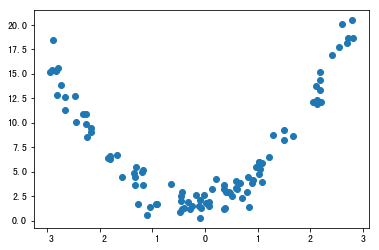

In [2]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1)
y=2*x**2+x+2+np.random.normal(0,1,100)
plt.scatter(x, y)
plt.show()

### 线性回归

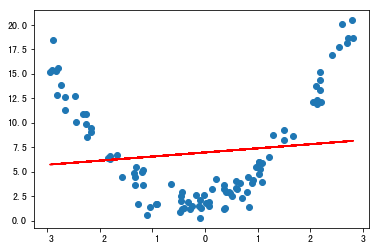

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
y_predict=lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

### 解决方案：升维，添加一个特征，x**2

In [4]:
X2=np.hstack([X,X**2])
X2.shape
lin_reg2=LinearRegression()
lin_reg2.fit(X2,y)
y_predict=lin_reg2.predict(X2)

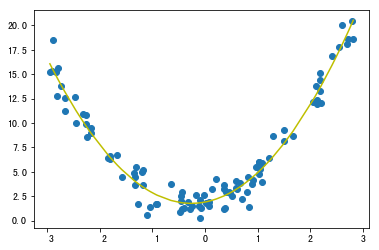

In [5]:
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)],color='y')

In [6]:
lin_reg2.coef_

array([1.0305967 , 1.98519613])

In [7]:
lin_reg2.intercept_

1.8949415611842069

# 02sklearn中多项式回归、pipeline（管道）

In [8]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [9]:
from sklearn.preprocessing import PolynomialFeatures
#增加一个/多个特征，属于数据预处理

poly=PolynomialFeatures(degree=3)     #传入允许的最高次
poly.fit(X)
X2=poly.transform(X)

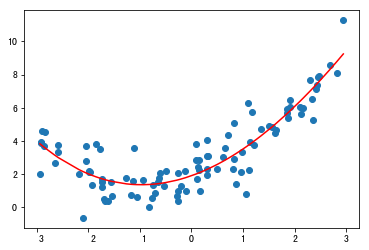

In [10]:
lin_reg3=LinearRegression()
lin_reg3.fit(X2,y)
y_predict2=lin_reg3.predict(X2)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [11]:
lin_reg3.coef_
#0次项，一次项，二次项，三次项（系数接近0）


array([ 0.        ,  1.09881941,  0.53642444, -0.0209746 ])

### PolynomialFeatures解释

In [12]:
X=np.arange(1,11).reshape(-1,2)
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [13]:
poly=PolynomialFeatures(degree=2)
poly.fit(X)
X2=poly.transform(X)

In [14]:
X2
#0次项，原本的两列，第一列**2，第一列*第二列，第二列**2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

## Pipeline

In [15]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#让数据依次做的事情：管道
poly_reg=Pipeline([
    ('Poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

In [16]:
poly_reg.fit(X,y)
y_predict=poly_reg.predict(X)

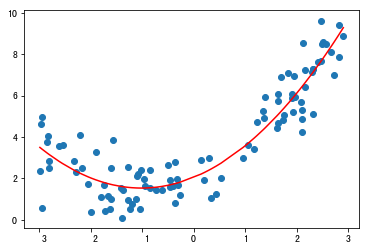

In [17]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

# 过拟合、欠拟合

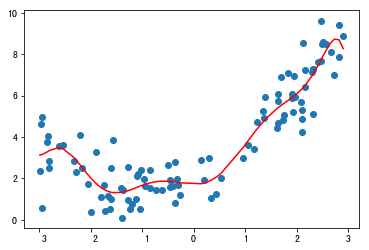

In [18]:
#欠拟合：拟合函数太简单，不能表格数据间关系
#过拟合：拟合函数太复杂，模型过多地表达了数据间的噪音关系
from sklearn.metrics import mean_squared_error
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X, y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

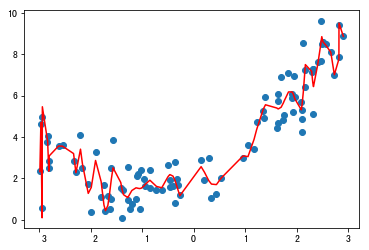

In [19]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X, y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

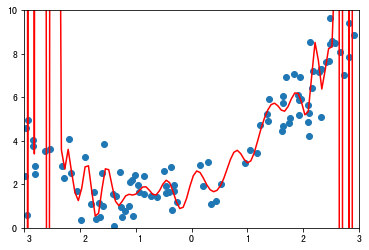

In [20]:
#让x分布均匀一点，要求尽量拟合全部点，有些点就会很极端也会拟合，预测时就会不准
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()
#过拟合

# 04train test split的意义-考察模型泛化能力

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [22]:
#线性回归
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_predict=lin_reg.predict(X_test)
mean_squared_error(y_test,y_predict)


3.395053733391147

In [23]:
#多项式回归
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train,y_train)
y_predict2=poly2_reg.predict(X_test)
mean_squared_error(y_test,y_predict2)

0.9300679788581343

In [24]:
#多项式回归
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train,y_train)
y_predict10=poly10_reg.predict(X_test)
mean_squared_error(y_test,y_predict10)


1.1050889258011092

In [25]:
#多项式回归
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train,y_train)
y_predict100=poly100_reg.predict(X_test)
mean_squared_error(y_test,y_predict100)
#模型更重要的是预测准确度，不是拟合准确度

2082085294962951.8

# 05学习曲线


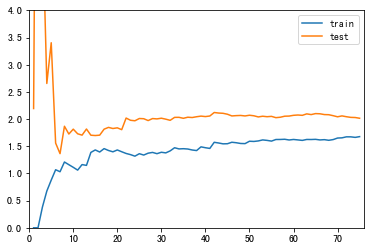

In [45]:
#随着训练样本的逐渐增多，算法训练出的模型的表现能力
from sklearn.model_selection import train_test_split
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
#绘制学习曲线
def plot_learning_curve(algo,X_train, X_test, y_train, y_test ):
    train_score=[]
    test_score=[]
    for i in range(1,76):
        algo.fit(X_train[:i],y_train[:i])

        y_train_predict=algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))

        y_test_predict=algo.predict(X_test[:i])
        test_score.append(mean_squared_error(y_test[:i],y_test_predict))

    plt.plot([i for i in range(1,76)],np.sqrt(train_score),label='train')
    plt.plot([i for i in range(1,76)],np.sqrt(test_score),label='test')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

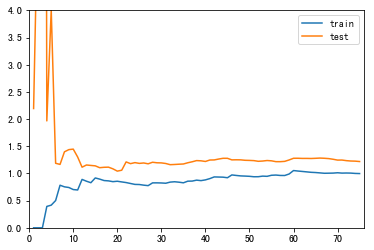

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg,X_train, X_test, y_train, y_test)


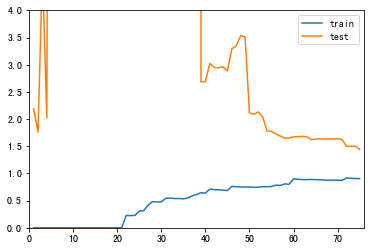

In [51]:

poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg,X_train, X_test, y_train, y_test)
#考察过拟合与欠拟合
#线性回归与多项式回归：线性回归train与test归于1.5-1.6之间，多项式回归归于1左右
#多项式回归2与20：20过拟合，预测效果差


# 06 validation and cross validation


In [53]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target


### 传统测试

In [57]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

from sklearn.neighbors import KNeighborsClassifier
best_k,best_p,best_score=0,0,0

for k in range(2,11):
    for p in range(1,6):
        knn_clf=KNeighborsClassifier(weights='distance',n_neighbors=k,p=p)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score>best_score:
            best_k,best_p,best_score=k,p,score
print('best_k=',best_k) 
print('best_p=',best_p)
print('best_score=',best_score)

best_k= 3
best_p= 4
best_score= 0.9860917941585535


### 使用交叉验证：原理

In [58]:

from sklearn.model_selection import cross_val_score
knn_clf=KNeighborsClassifier()
cross_val_score(knn_clf,X_train,y_train)
#默认分3份，进行交叉验证

array([0.98895028, 0.97777778, 0.96629213])

In [59]:
best_k,best_p,best_score=0,0,0

for k in range(2,11):
    for p in range(1,6):
        knn_clf=KNeighborsClassifier(weights='distance',n_neighbors=k,p=p)
        score=np.mean(cross_val_score(knn_clf,X_train,y_train))
        if score>best_score:
            best_k,best_p,best_score=k,p,score
print('best_k=',best_k) 
print('best_p=',best_p)
print('best_score=',best_score)



best_k= 2
best_p= 2
best_score= 0.9823599874006478


#交叉验证结果会优于单纯线性回归，单纯回归会有对X_test过拟合的可能

In [60]:
#交叉验证的拟合结果:找到最优超参数，拟合
best_knn_clf=KNeighborsClassifier(weights='distance',n_neighbors=2,p=2)
best_knn_clf.fit(X_train,y_train)
best_knn_clf.score(X_test,y_test)

0.980528511821975

### 用网格搜索验证上述结果（其实两种方式是一回事）

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(2, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   54.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=5,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

对上述结果的解释：3份，交叉验证，k:9,p:5,45种组合，每个组合分3份，135次fit

In [62]:
grid_search.best_score_

0.9823747680890538

In [63]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [65]:
best_knn_clf=grid_search.best_estimator_
best_knn_clf.score(X_test,y_test)

0.980528511821975

## cv参数

In [66]:
cross_val_score(knn_clf, X_train, y_train, cv=5)

array([0.99543379, 0.96803653, 0.98148148, 0.96261682, 0.97619048])

In [67]:
grid_search = GridSearchCV(knn_clf, param_grid, verbose=1, cv=5)

# 08正则化——岭回归Ridge Regression

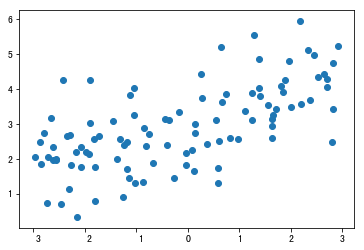

In [94]:
#岭回归：降低theta的值，避免像上面出现theta上亿的情况
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)
plt.scatter(X,y)


### 线性回归

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)



167.94010860023363

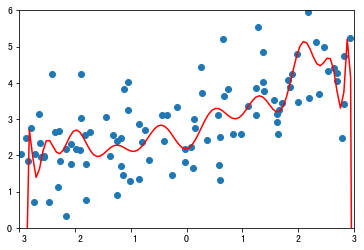

In [96]:
#封装绘图函数
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
plot_model(poly_reg)

### 岭回归

In [98]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])
ridge1_reg=RidgeRegression(20,0.0001)
ridge1_reg.fit(X_train,y_train)
y1_predict=ridge1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.3233492754070724

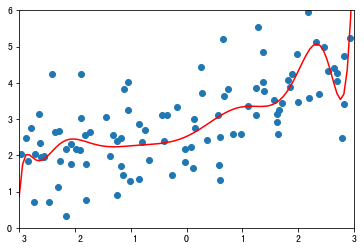

In [99]:
plot_model(ridge1_reg)

In [101]:
ridge2_reg=RidgeRegression(20,1)
ridge2_reg.fit(X_train,y_train)
y2_predict=ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.1888759304218448

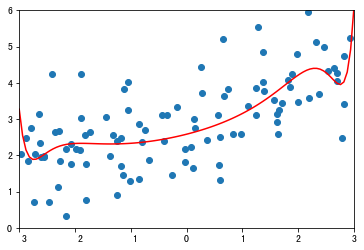

In [102]:
plot_model(ridge2_reg)

In [103]:
ridge3_reg=RidgeRegression(20,100)
ridge3_reg.fit(X_train,y_train)
y3_predict=ridge3_reg.predict(X_test)
mean_squared_error(y_test,y3_predict)

1.3196456113086197

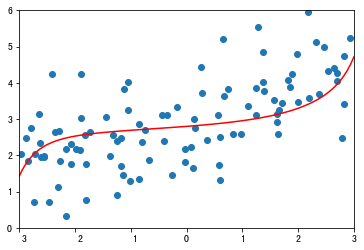

In [105]:
plot_model(ridge3_reg)

In [106]:
ridge4_reg=RidgeRegression(20,100000000)
ridge4_reg.fit(X_train,y_train)
y4_predict=ridge4_reg.predict(X_test)
mean_squared_error(y_test,y4_predict)

1.840889124848122

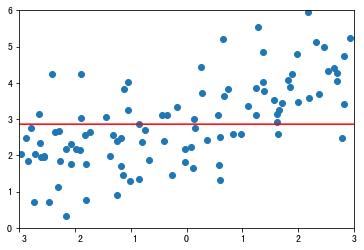

In [107]:
plot_model(ridge4_reg)

# 09正则化——Lasso回归


In [109]:
from sklearn.linear_model import Lasso

def LassoRegression(degree,alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha))
    ])
lasso1_reg=LassoRegression(20,0.01)
lasso1_reg.fit(X_train,y_train)
y1_predict=lasso1_reg.predict(X_test)
mean_squared_error(y_test,y1_predict)

1.1496080843259966

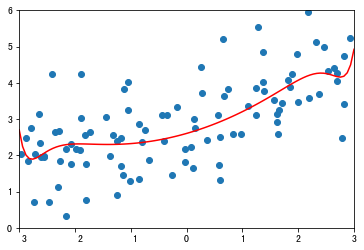

In [110]:
plot_model(lasso1_reg)

In [111]:
lasso2_reg=LassoRegression(20,0.1)
lasso2_reg.fit(X_train,y_train)
y2_predict=lasso2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.1213911351818648

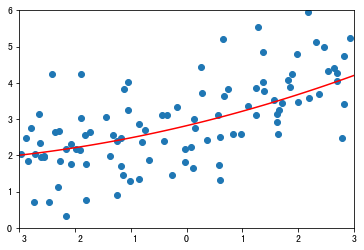

In [112]:
plot_model(lasso2_reg)

In [113]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

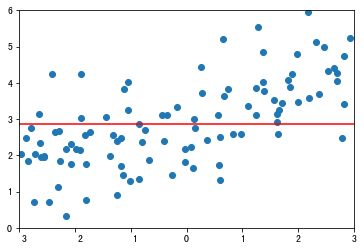

In [114]:
plot_model(lasso3_reg)

In [ ]:
#Lasso回归会让一些theta为0，可以作为选取特征值的方法，岭回归则不可以